In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics import roc_curve,auc,precision_recall_curve,roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections


import matplotlib.pyplot as plt
from mmoe import MMoE
from helper import custom_loss, filter_label, get_data, cus_accuracy

In [1]:
from mmoe_mod import mmoe_model
from ctrcvr import CTCVRNet

2022-05-08 05:13:03.695321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-08 05:13:03.695349: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
tf.config.set_soft_device_placement(False)
tf.debugging.set_log_device_placement(False)
def MTL_model(model_type,dataset, custom_path=None, epoches=5, verbose=0):
    labels_dict={"Census-income":["income_50k", "marital_stat"],"Tencent2020":["age","gender"],"Titanic":["Survived","Pclass"],"Generated":["label0","label1"]}
    labels=labels_dict[dataset]
    if custom_path:
        data=get_data(custom_path,labels=labels)        
    else:
        data=get_data("/mnt/w/6998/Project/data/"+dataset,labels=labels)
    
    if model_type=="ctrcvr":
        model=CTCVRNet()
    else:
        model=mmoe_model(data.shape[1]-2)

    
    model.train(data,labels, plot_list=["loss","accuracy","auc","pr"],epoches=epoches ,verbose=verbose)

Datasets used : ['date_0.csv', 'date_1.csv']
All features we used: ['feature_8', 'feature_9', 'feature_7', 'feature_1', 'feature_3', 'feature_2', 'feature_5', 'feature_10', 'feature_4', 'feature_6'] (at most 10)


2022-05-08 05:13:22.657748: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-08 05:13:22.657779: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-08 05:13:22.657796: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-94CNSCG): /proc/driver/nvidia/version does not exist
2022-05-08 05:13:22.657933: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 m_mo_e (MMoE)                  [(None, 16),         1584        ['input_1[0][0]']                
                                 (None, 16)]                                                      
                                                                                                  
 dense (Dense)                  (None, 8)            136         ['m_mo_e[0][0]']                 
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['m_mo_e[0][1]']             

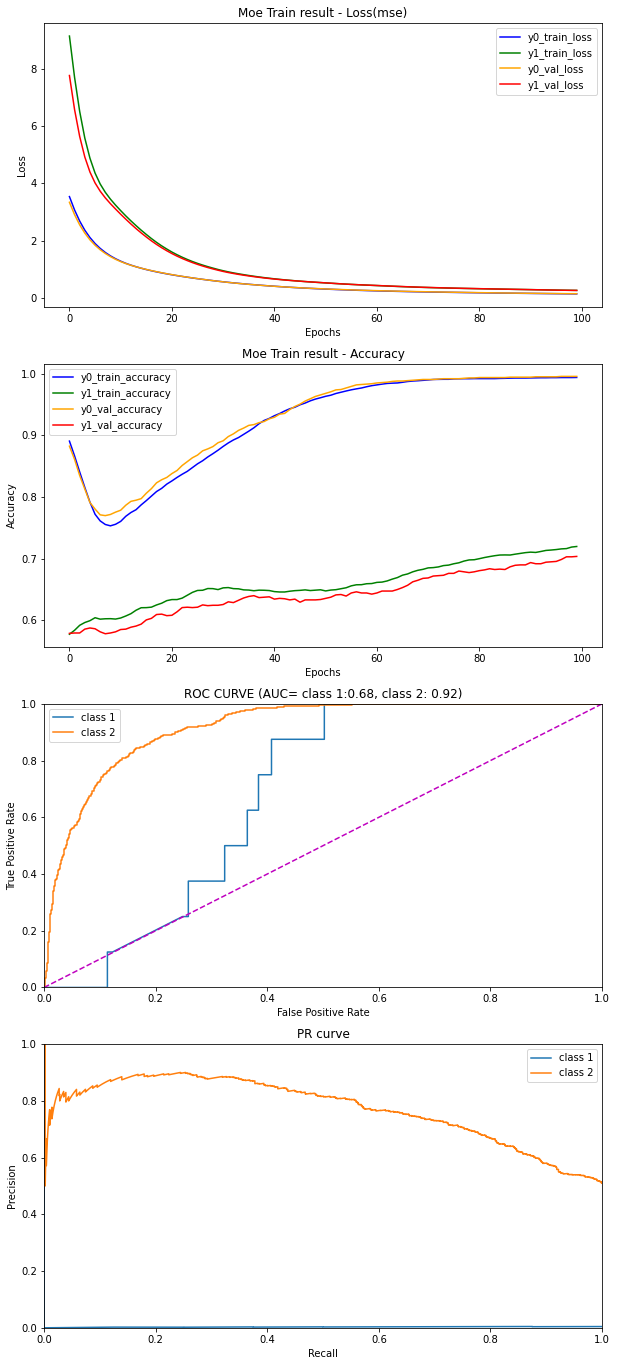


Time used to train the model:  4.78477s


In [4]:
MTL_model("mmoe","Generated", epoches=100)

Datasets used : ['census-income.csv']
All features we used: ['det_ind_code_1', 'det_ind_code_5', 'major_ind_code_ Forestry and fisheries', 'det_occ_code_33', 'det_occ_code_5', 'det_occ_code_21', 'country_father_ El-Salvador', 'det_occ_code_15', 'country_mother_ South Korea', 'country_father_ Ecuador'] (at most 10)


2022-05-08 05:04:22.675162: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-08 05:04:22.675196: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-08 05:04:22.675207: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-94CNSCG): /proc/driver/nvidia/version does not exist
2022-05-08 05:04:22.675341: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 499)]        0           []                               
                                                                                                  
 m_mo_e (MMoE)                  [(None, 16),         72000       ['input_1[0][0]']                
                                 (None, 16)]                                                      
                                                                                                  
 dense (Dense)                  (None, 8)            136         ['m_mo_e[0][0]']                 
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['m_mo_e[0][1]']             

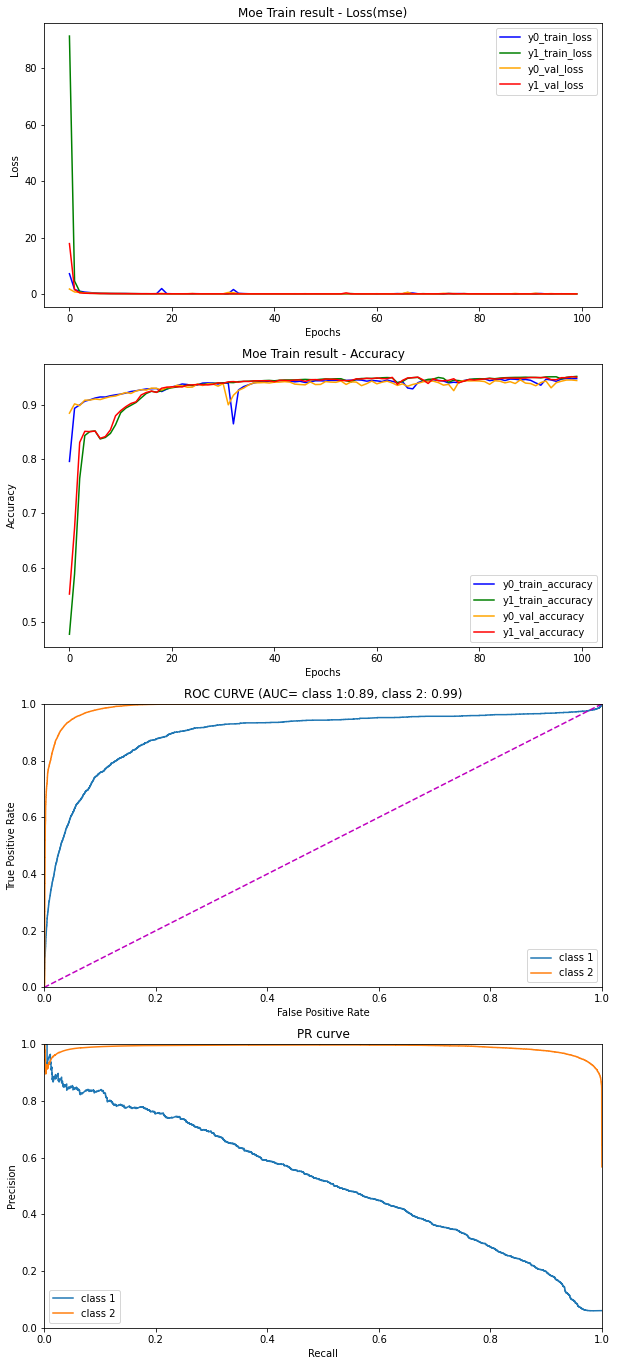


Time used to train the model:  41.21512s


In [4]:
MTL_model("mmoe","Census-income", epoches=100)

Datasets used : ['click_100k_age.csv', 'click_100k_gender.csv', 'click_300k_both.csv']
All features we used: ['user_id', 'product_id', 'product_category', 'ad_id', 'click_times', 'industry', 'creative_id', 'advertiser_id', 'time'] (at most 10)


/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 9)]          0           []                               
                                                                                                  
 m_mo_e_16 (MMoE)               [(None, 16),         1440        ['input_17[0][0]']               
                                 (None, 16)]                                                      
                                                                                                  
 dense_32 (Dense)               (None, 8)            136         ['m_mo_e_16[0][0]']              
                                                                                                  
 dense_33 (Dense)               (None, 8)            136         ['m_mo_e_16[0][1]']       

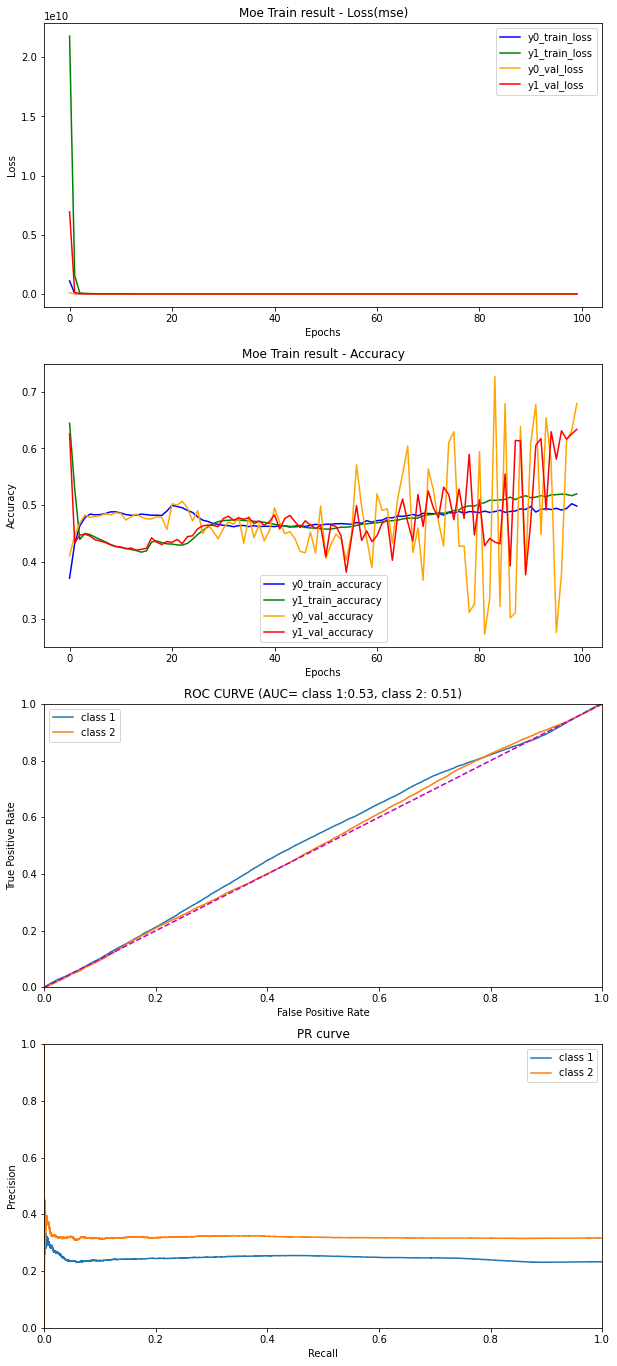


Time used to train the model:  50.38554s


In [20]:
MTL_model("mmoe","Tencent2020", epoches=100)

Datasets used : ['titanic.csv']
All features we used: ['SibSp', 'Age', 'Sex', 'Fare', 'Parch'] (at most 10)
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 m_mo_e_5 (MMoE)                [(None, 16),         864         ['input_6[0][0]']                
                                 (None, 16)]                                                      
                                                                                                  
 dense_10 (Dense)               (None, 8)            136         ['m_mo_e_5[0][0]']               
                                                                                   

/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Counter({0: 107, 1: 72})
Counter({1: 99, 0: 80})


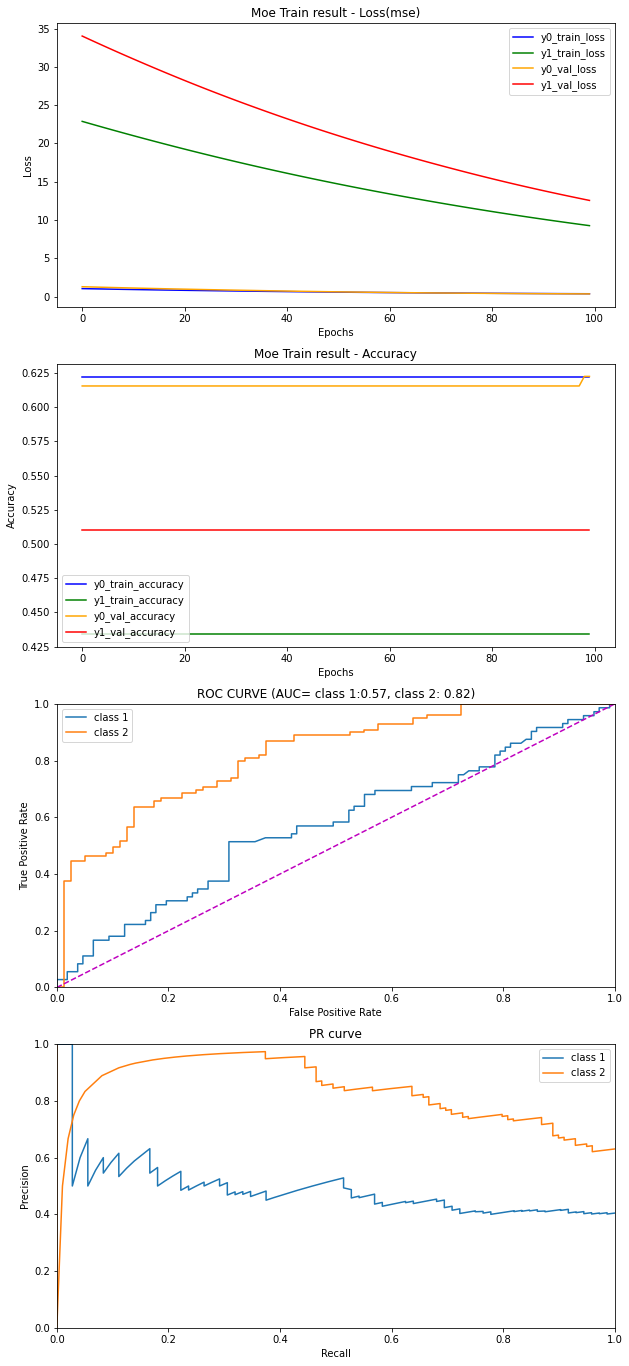


Time used to train the model:  2.44981s


In [9]:
MTL_model("mmoe","Titanic", epoches=100)